In [24]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge,Lasso, LinearRegression

In [2]:
dataset = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [11]:
dataset = dataset.dropna()

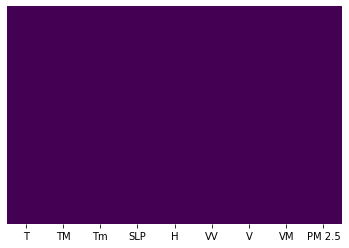

In [12]:
import seaborn as sns
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap='viridis')

In [15]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [22]:
param = dict(alpha =[1e-10, 1e-8, 1e-7, 1e-5, 1e-4, 1e-2, 1e-1, 1, 10, 20, 35, 40])
model = Ridge()
gridsearchcv = GridSearchCV(model, param_grid=param, scoring='neg_mean_squared_error', cv=5)

In [23]:
gridsearchcv.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-10, 1e-08, 1e-07, 1e-05, 0.0001, 0.01,
                                   0.1, 1, 10, 20, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [19]:
gridsearchcv.best_params_

{'alpha': 40}

In [29]:
model = Ridge(alpha=40)
print(cross_val_score(model, X,y, scoring='neg_mean_squared_error', cv = 5).mean())

-3664.3648996071743


In [30]:
# comparing above score with linear regression
model = LinearRegression()
print(cross_val_score(model, X,y, cv = 5, scoring='neg_mean_squared_error').mean())

-3686.201777339885


In [31]:
model = Lasso()
gridsearchcv = GridSearchCV(model, param_grid=param, cv=5, scoring='neg_mean_squared_error')
gridsearchcv.fit(X,y)
print(gridsearchcv.best_params_, gridsearchcv.best_score_)

/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114628.18918145029, tolerance: 678.9710639134807
  positive)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421631.4676428768, tolerance: 626.8737580831347
  positive)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94928.22423692187, tolerance: 618.8373022742737
  positive)
/home/harsh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number

{'alpha': 1} -3665.6636891108833


In [ ]:
import pickle
file = open('Data/lassoRe', 'wb')
pickle.dump(model, file)